In [0]:
import torch
# from fastai2.vision.all import *
# from fastai2.callback.all import *
from fastai.vision import *
from fastai.basics import *
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

defaults.device = torch.device('cuda') # makes sure the gpu is used

In [0]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)
def label_func(fname):
    return lbl_dict[fname]
# def get_labels(file_path): return '3' if '/3/' in str(file_path) else '7'

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
def get_callbacks(model_name):
  return [
          # SaveModelCallback(model_name, every='improvement', monitor='accuracy', name='best'),
          ReduceLROnPlateauCallback(model_name, patience = 5, min_lr = 1e-6 )
          ]

In [0]:
model = models.resnet18

## Imagenette-160

In [0]:
# !unzip imagenette2-160.zip -d .

In [0]:
from os import path

if not path.exists('./imagenette2-160'):
  !pip install wget;

  import wget
  wget.download('https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz', './imagenette2-160.tgz');
  !tar -xvf ./imagenette2-160.tgz;
  !rm imagenette2-160.tgz

In [0]:
path =  './imagenette2-160'

im_loader = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, size = 160).normalize(imagenet_stats)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-04
Min loss divided by 10: 3.98E-03


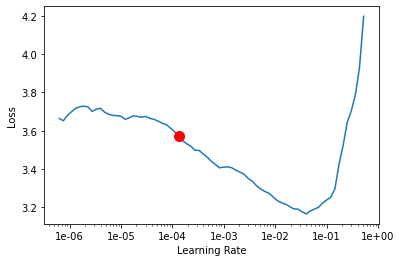

In [0]:
learn = cnn_learner(im_loader, model, metrics=[accuracy], pretrained=False)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
assert(False)

NameError: ignored

In [0]:
learn.fit_one_cycle(15, 2e-2)

# learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,2.009014,2.277771,0.316654,00:25
1,1.768253,2.919032,0.385736,00:25
2,2.247396,3.110321,0.173637,00:25
3,1.927735,1.852564,0.415609,00:25
4,1.495852,1.384660,0.543689,00:25
5,1.225736,1.199753,0.610904,00:25
6,1.096257,1.158266,0.626214,00:25
7,0.937064,1.253711,0.632562,00:25
8,0.808449,1.055198,0.670650,00:25
9,0.658240,0.827782,0.749066,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.081951,1.049680,0.779313,00:25
1,0.223886,1.189890,0.737491,00:25
2,0.443616,1.087783,0.709111,00:25


KeyboardInterrupt: ignored

## Stylized-imagenette-160

In [0]:
import os
if not os.path.isdir('./stylized-imagenette2-160'):
  import gdown
  url = 'https://drive.google.com/uc?id=1uWdWq_GWzyG8iUzd9bwEugNqnlo_yXFq'
  output = 'stylized-imagenette2-160.zip'
  gdown.download(url, output, quiet=False)
  !unzip "stylized-imagenette2-160.zip" -d .

In [0]:
# %rm -r /content/stylized-imagenet-160

In [0]:
np.random.seed(42)
path = './stylized-imagenette2-160'
sin_loader = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, size=160).normalize(imagenet_stats)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 3.98E-03


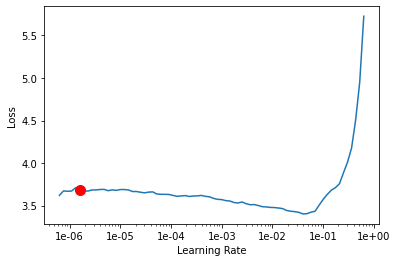

In [0]:
stylized_learn = cnn_learner(sin_loader, model, metrics=accuracy, pretrained=False)
stylized_learn.lr_find()
stylized_learn.recorder.plot(suggestion=True)

In [0]:
assert(False)

In [0]:
# https://docs.fast.ai/callbacks.tracker.html#SaveModelCallback
stylized_learn.fit_one_cycle(15, 1e-2)

# stylized_learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,2.679964,2.149810,0.255788,00:25
1,2.361478,2.854386,0.224421,00:25
2,2.238647,7.673006,0.140777,00:25
3,2.023168,2.565301,0.329724,00:25
4,1.774949,1.867453,0.379761,00:25
5,1.609180,1.791069,0.413742,00:25
6,1.473408,1.682769,0.458551,00:25
7,1.303650,1.517850,0.512696,00:25
8,1.048102,1.439730,0.558252,00:25
9,0.753760,1.324117,0.600448,00:25


# Test set results

## SIN --> SIN

In [0]:
from copy import deepcopy

path =  './imagenette2-160'
in_loader_test = ImageDataBunch.from_folder(path, train='train', valid='val',size=160).normalize(imagenet_stats)

path = './stylized-imagenette2-160'
sin_loader_test = ImageDataBunch.from_folder(path, train='train', valid='val',size=160).normalize(imagenet_stats)


test_set_in = deepcopy(in_loader_test.valid_dl)
test_set_sin = deepcopy(sin_loader_test.valid_dl)

# test_set_sin = deepcopy(stylized_learn.data.valid_dl)
# test_set_in = deepcopy(learn.data.valid_dl)

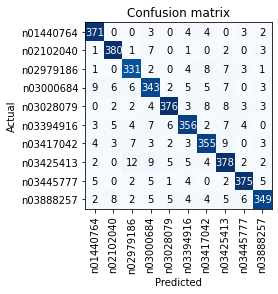

In [0]:
stylized_learn.data.valid_dl = test_set_sin
interp_sin = ClassificationInterpretation.from_learner(stylized_learn)
interp_sin.plot_confusion_matrix()

In [0]:
stylized_learn.validate(test_set_sin, metrics = [accuracy])

[0.38284552, tensor(0.9208)]

## SIN --> IN

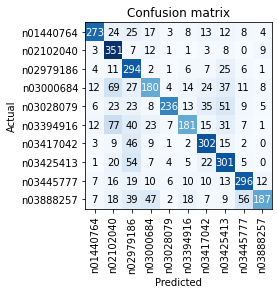

In [0]:
stylized_learn.data.valid_dl = test_set_in
interp_in = ClassificationInterpretation.from_learner(stylized_learn)
interp_in.plot_confusion_matrix()

In [0]:
stylized_learn.validate(test_set_in, metrics = [accuracy])

[1.747339, tensor(0.6627)]

## IN --> IN

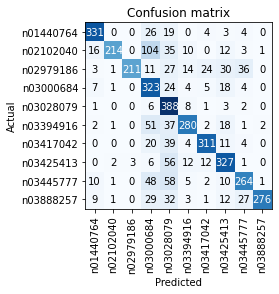

In [0]:
learn.data.valid_dl = test_set_in
interp_sin = ClassificationInterpretation.from_learner(learn)
interp_sin.plot_confusion_matrix()

In [0]:
learn.validate(test_set_in, metrics = [accuracy])

[0.9117427, tensor(0.7452)]

## IN --> SIN


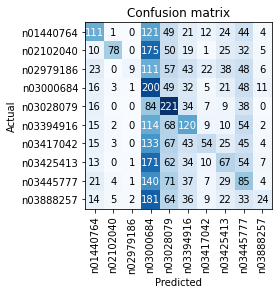

In [0]:
learn.data.valid_dl = test_set_sin
interp_sin = ClassificationInterpretation.from_learner(learn)
interp_sin.plot_confusion_matrix()

In [0]:
learn.validate(test_set_sin, metrics = [accuracy])

[3.5560243, tensor(0.2469)]

## SIN + IN --> IN

In [0]:
if not os.path.isdir('./sin-in'):
  import gdown
  url = 'https://drive.google.com/uc?id=1VwQkoxr7dhwnbJx7RRnaopqSf3o7VmR1'
  output = 'sin-in.zip'
  gdown.download(url, output, quiet=False)
  !unzip "sin-in.zip" -d .

In [0]:
np.random.seed(42)
path = './sin-in'
sinin_loader = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2,size=160).normalize(imagenet_stats)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-05
Min loss divided by 10: 4.79E-03


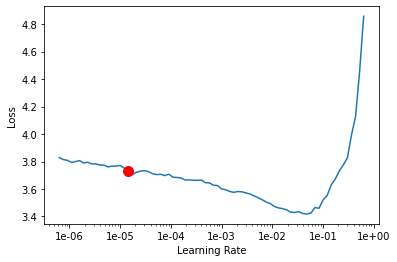

In [0]:
sinin_learn = cnn_learner(sinin_loader, model, metrics=accuracy, pretrained=False)
sinin_learn.lr_find()
sinin_learn.recorder.plot(suggestion=True)

In [0]:
assert(false)

epoch,train_loss,valid_loss,accuracy,time
0,2.191015,2.712008,0.335449,00:51
1,1.884552,2.659980,0.432332,00:51
2,1.597665,1.563651,0.496173,00:51
3,1.342955,1.436894,0.543028,00:51
4,1.154706,1.272840,0.585402,00:51
5,0.984846,1.037951,0.666044,00:51
6,0.803821,0.958249,0.695165,00:51
7,0.553559,0.827620,0.737166,00:51
8,0.352102,0.792792,0.770767,00:51
9,0.172740,0.884937,0.779167,00:51


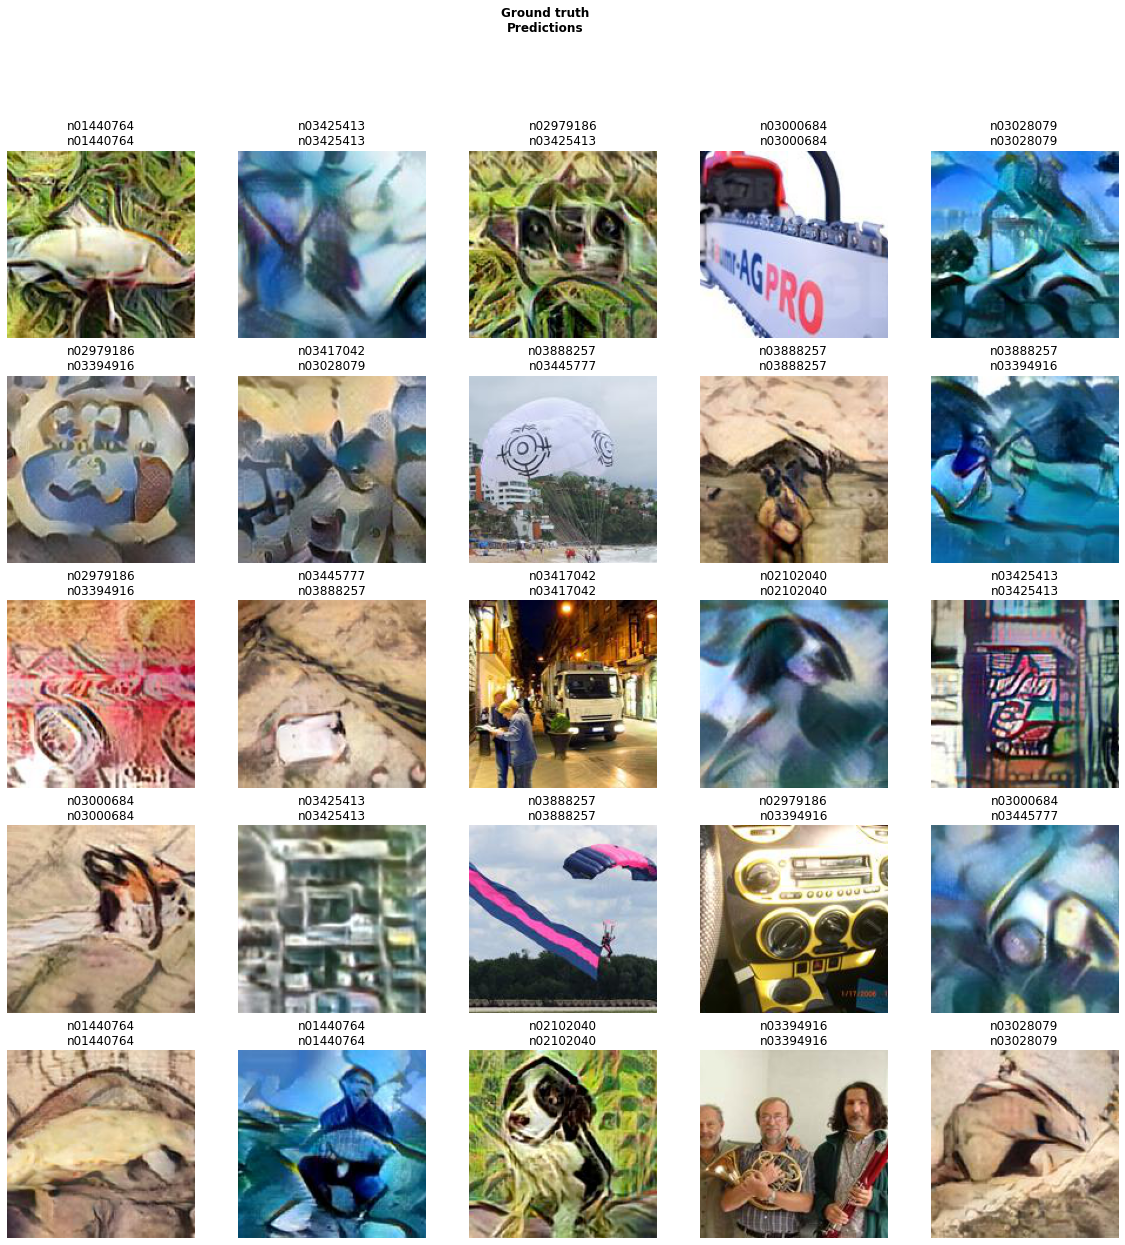

In [0]:
# https://docs.fast.ai/callbacks.tracker.html#SaveModelCallback
sinin_learn.fit_one_cycle(15, 1e-2)

# sinin_learn.show_results()

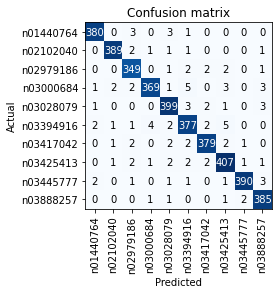

In [0]:
sinin_learn.data.valid_dl = test_set_in
interp_sinin = ClassificationInterpretation.from_learner(sinin_learn)
interp_sinin.plot_confusion_matrix()

In [0]:
sinin_learn.validate(test_set_in, metrics = [accuracy])

[0.14709543, tensor(0.9743)]

## SIN + IN + finetune(IN)-> IN

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 4.79E-05


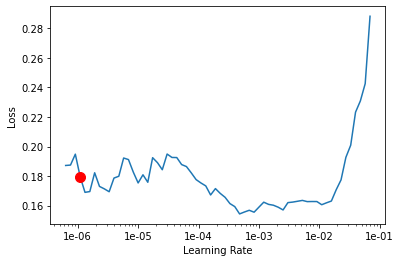

In [0]:
train_set_in = deepcopy(in_loader_test.train_dl)

sinin_finetune_learn = deepcopy(sinin_learn)
sinin_finetune_learn.data.train_dl = train_set_in # use only IN dataset for finetune
sinin_finetune_learn.unfreeze()
sinin_finetune_learn.lr_find()
sinin_finetune_learn.recorder.plot(suggestion=True)
sinin_finetune_learn.freeze() 

In [0]:
assert(False)

In [0]:
# sinin_learn.summary()

In [0]:
# sinin_finetune_learn.summary()

In [0]:
sinin_finetune_learn.fit_one_cycle(15, 2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.169703,0.140049,0.973758,00:24
1,0.190493,0.139885,0.974777,00:24
2,0.166002,0.137836,0.974268,00:24
3,0.170907,0.134890,0.974777,00:24
4,0.158256,0.129471,0.975032,00:24
5,0.151090,0.129762,0.975032,00:24
6,0.144197,0.124973,0.975032,00:24
7,0.133999,0.126246,0.976051,00:24


Exception in thread Thread-136:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/pin_memory.py", line 25, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 294, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  File "/usr/lib/pyth

KeyboardInterrupt: ignored

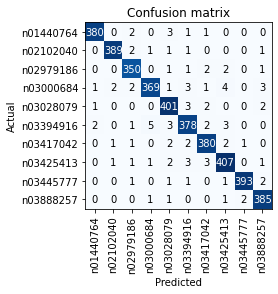

In [0]:
sinin_finetune_learn.data.valid_dl = test_set_in
interp_sinin_finetune = ClassificationInterpretation.from_learner(sinin_finetune_learn)
interp_sinin_finetune.plot_confusion_matrix()

In [0]:
sinin_finetune_learn.validate(test_set_in, metrics = [accuracy])

[0.12403922, tensor(0.9763)]

# Best Results

In [0]:
stylized_learn_2 = cnn_learner(stylized_loader, resnet18, metrics=accuracy, pretrained=False)
stylized_learn.fit_one_cycle(20, 5e-3)
stylized_learn.show_results()
preds,y,losses = learn.get_preds(with_loss=True)
# preds_npy = preds[0].cpu().detach().numpy()
# preds_npy.shape # test set has 3791 images